# SPAM E_MAIL DETECTION

# Importing libraries


In [298]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Using the pandas I'm importing the data set


In [300]:
df = pd.read_csv('spam (or) ham.csv')

In [301]:
# After Importing the dataset i have stored my dataset in 'df' variable.
# If we run 'df' command it will print first 5 rows and last 5 rows of the dataframe as shown below.
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# understanding the data

In [303]:
# To print the first 5 rows of the dataframe we use a command "df.head()".
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [304]:
# To print the last 5 rows of the dataframe we use a command "df.tail()".
df.tail()

,Class,sms
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,spam,This is the 2nd time we have tried 2 contact u...


In [305]:
# "df.columns" it will print columns which are presented in a dataframe.
df.columns

Index(['Class', 'sms'], dtype='object')

In [306]:
# "df.info()" It will show the complete information of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5573 non-null   object
 1   sms     5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [307]:
# Data Cleaning
# finding missing Values and duplicates

In [308]:
df.isnull().sum()
# After executing the above command there in no null values in my dataframe.

Class    0
sms      0
dtype: int64

In [309]:
# "df.duplicated().sum()" If we execute this command it will show how many duplicates are presented in our dataframe.
df.duplicated().sum()

403

In [310]:
# Here I'm dropping the duplicates from dataframe.
df.drop_duplicates()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [311]:
# Printing the length of the dataframe.
print("Length of the Dataset")
print(len(df))

Length of the Dataset
5573


### Data Visualization

#### Importing visualizing libraries to visualize the data

In [314]:
import matplotlib.pyplot as plt         
import seaborn as sns

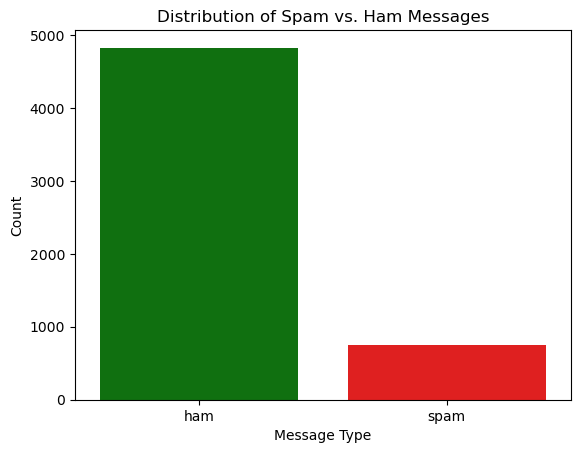

Below output shows that how many ham mails and spam mails are presented in our Dataset by numerically and above countplot shows by visualizing.
Class
ham     4825
spam     748
Name: count, dtype: int64


In [315]:
# Class Distriburion "Count Plot"

custom_palette = {"spam": "red", "ham": "green"}

sns.countplot(x="Class", hue="Class", data=df, palette=custom_palette)
plt.title("Distribution of Spam vs. Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()
print("Below output shows that how many ham mails and spam mails are presented in our Dataset by numerically and above countplot shows by visualizing.")
print(df['Class'].value_counts())

##### ==>Above count plot Shows total spam vs. ham distribution.

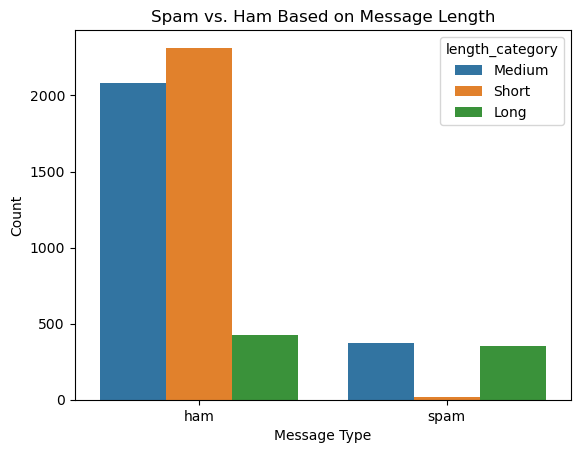

Below output shows that how many 'short','medium','long'(spam vs ham mails) are presented in our Dataset by numerically and above plot shows by visualizing.
length_category
Medium    2455
Short     2335
Long       783
Name: count, dtype: int64


In [317]:
# To visualize the distribution of Spam vs Ham messages based on length categories (Short, Medium, Long).
# If you categorize messages by length (Short, Medium, Long), you can see if spam messages are typically longer or shorter.
df['length_category'] = df['sms'].apply(lambda x: 'Long' if len(x) > 150 else 'Medium' if len(x) > 50 else 'Short')

sns.countplot(x='Class', hue='length_category', data=df)
plt.title("Spam vs. Ham Based on Message Length")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()
print("Below output shows that how many 'short','medium','long'(spam vs ham mails) are presented in our Dataset by numerically and above plot shows by visualizing.")
print(df['length_category'].value_counts())

In [318]:
# Printing Spam and Ham separately to see how many 'long','medium','short' mail presented in dataframe.
print(df.groupby(['Class', 'length_category']).size())

Class  length_category
ham    Long                427
       Medium             2084
       Short              2314
spam   Long                356
       Medium              371
       Short                21
dtype: int64


# Label Encoding

In [320]:
# Here label encoding is nothing but there are 'spam' and 'ham' two categories are presented in our dataframe.
# So, here 'spam' has encoding with 0 from class column and 'ham' has encoding with 1 from class column
# label spam mail as 0: ham mail as 1:
df.loc[df['Class'] == 'spam','Class',] = 0
df.loc[df['Class'] == 'ham','Class',] = 1
# After Encoding the two categories,

# Here I'm Separting the data as texts and label.
# Here texts is nothing but 'sms' and label is nothing but 'class' which is encoded with 0 & 1.
X = df['sms']
y = df['Class'].astype(int)

In [321]:
# Here I have stored 'sms' column in 'X' variable, After printing 'X' it will show complete text data from 'sms' column.
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    This is the 2nd time we have tried 2 contact u...
Name: sms, Length: 5573, dtype: object


In [322]:
# Here I have stored 'class' encoded coloumn in 'y' variable, After printing 'y' it will show label encoded column.
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5568    1
5569    1
5570    1
5571    1
5572    0
Name: Class, Length: 5573, dtype: int32


# Splitting the data into training data & test data

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5573,)
(4458,)
(1115,)


In [325]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5573,)
(4458,)
(1115,)


# Feature Extraction

In [327]:
# Transform the text data to feature vectors that can be used as input to the Logistic Regression
# Convert text data to numerical data using TF-IDF
feature_extraction = TfidfVectorizer()
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [328]:
print(X_train)

1350    FREE2DAY sexy St George's Day pic of Jordan!Tx...
5543               U still havent got urself a jacket ah?
1168              Lol now I'm after that hot air balloon!
4129           I dont thnk its a wrong calling between us
4350          Ü bot notes oredi... Cos i juz rem i got...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: sms, Length: 4458, dtype: object


In [329]:
# printing X_train_features
print(X_train_features)

  (0, 86)	0.23373948548616907
  (0, 7133)	0.151866003065756
  (0, 1899)	0.16227349064166227
  (0, 5302)	0.23373948548616907
  (0, 5227)	0.19246563127552246
  (0, 4603)	0.14062424804988644
  (0, 1724)	0.23373948548616907
  (0, 5937)	0.2256419285396194
  (0, 7569)	0.33600862100437656
  (0, 2664)	0.15399135867487823
  (0, 6843)	0.11741967430118057
  (0, 5023)	0.11428894075721893
  (0, 4529)	0.14760023871043806
  (0, 2421)	0.13184840310811743
  (0, 727)	0.23373948548616907
  (0, 6946)	0.06177889099936093
  (0, 7106)	0.12898346558759763
  (0, 3859)	0.2256419285396194
  (0, 4908)	0.09282755819352678
  (0, 5222)	0.3807593409600069
  (0, 2193)	0.1196100359200847
  (0, 3120)	0.23373948548616907
  (0, 6442)	0.20281619751812804
  (0, 6066)	0.1789668049692578
  (0, 2984)	0.23373948548616907
  :	:
  (4453, 7715)	0.10187968403020241
  (4453, 1612)	0.20202035391079648
  (4453, 3216)	0.18799886195873172
  (4454, 4042)	0.5574744074239575
  (4454, 1628)	0.39538326672265084
  (4454, 6346)	0.5493181746686

# Training the Model:
# Logistic Regression Model:

In [331]:
# Train a Logistic Regression model
log_basic = LogisticRegression()
log_basic.fit(X_train_features, y_train)

LogisticRegression()

###### ***After building a model we can evaluate the trained model.***

#### Evaluating the trained model

#### ***Prediction on Training data***

In [335]:
prediction_on_training_data = log_basic.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on training data: ',accuracy_on_training_data)

Accuracy on training data:  0.9771197846567967


#### ***Prediction on Test data***

In [337]:
prediction_on_test_data = log_basic.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on test data: ',accuracy_on_test_data)

Accuracy on test data:  0.9713004484304932


####  I got an accuracy of both trained data and a test data

#### Now I'M making the prediction by giving an input to check if my model is working or not

In [340]:
# input from my data set 
# Here I took one Ham mail from my dataset
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = log_basic.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail


In [341]:
# input from my data set 
# Here i took one Spam mail from my dataset
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = log_basic.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail


#### AFTER PREDICTING MY MODEL IS GIVING CORRECT OUTPUT AND MY MODEL IS WORKING WELL

### Comparing Logistic Regression Model with Naive Bayes Model

# Naive Bayes Model

In [344]:
# By Using Sklearn I called the Naive Bayes Classifier Model

from sklearn.naive_bayes import MultinomialNB

In [345]:
# Train a Naive bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_features, y_train)

MultinomialNB()

###### MultinomialNB is one of the types of Naive Bayes classifiers in sklearn. It is specifically designed for multinomially distributed data — that is, data where features represent counts or frequencies of events (like words in a document).

###### In text classification problems like spam detection, your features are often counts or frequencies of words in an email. The Multinomial Naive Bayes model works well because:

###### It assumes that the features (words) are independent of one another.

###### It calculates the probability that an email is spam or ham based on the presence (or frequency) of certain words in the email.

###### ***After building a model we can evaluate the trained model***

###### ***Evaluating the trained model***

#### ***Prediction on Training data***

In [348]:
# Predicting on training data for Naive Bayes
prediction_on_training_data_nb = naive_bayes_model.predict(X_train_features)
accuracy_on_training_data_nb = accuracy_score(y_train, prediction_on_training_data_nb)
print('Naive Bayes Accuracy on training data: ', accuracy_on_training_data_nb)

Naive Bayes Accuracy on training data:  0.9726334679228353


#### ***Prediction on Test data***

In [350]:
# Predicting on test data for Naive Bayes
prediction_on_test_data_nb = naive_bayes_model.predict(X_test_features)
accuracy_on_test_data_nb = accuracy_score(y_test, prediction_on_test_data_nb)
print('Naive Bayes Accuracy on test data: ', accuracy_on_test_data_nb)

Naive Bayes Accuracy on test data:  0.9614349775784753


#### I got an accuracy of both trained data and a test data

#### Now I'M making the prediction by giving an input to check if model is working or not

In [352]:
# input from my data set 
# Here i took one Ham mail from my dataset
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = naive_bayes_model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail


In [353]:
# input from my data set 
# Here I took one Spam mail from my dataset
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = naive_bayes_model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail


#### AFTER PREDICTING NAIVE BAYES MODEL IT IS ALSO GIVING CORRECT OUTPUT AND MODEL IS WORKING WELL

#### AFTER COMPARING LOGISTIC REGRESSION MODEL WITH NAIVE BAYES CLASIFIER 

 In Logistic Regression Model I have got an Accuracy of Trained Data is      : 0.9771197846567967
                                                        Test Data is         : 0.9713004484304932

 In Naive Bayes Clasifier Model I have got an Accuracy of Trained Data is    : 0.9726334679228353 (some what better than logistic Regression model)
                                                          Test Data is       : 0.9614349775784753

 Here If we observe closely of both trained and test data accuracy Logistic Regression is better accuracy than Naive Bayes Classifier


### Comparing Both Logistic Regression Model and Naive Bayes Model With SVM

# SVM MODEL(Support Vector Machine)

In [391]:
# By Using Sklearn I called the SVM Model(Support Vector Machine)

from sklearn.svm import SVC

In [393]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_features, y_train)

SVC()

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification tasks. It works by finding the optimal hyperplane that separates data points of different classes with the maximum margin. SVM is effective in high-dimensional spaces and can handle both linear and non-linear data using kernel functions. It is widely used in text classification, image recognition, and medical diagnosis.

#### After building a model we can evaluate the trained model

#### Evaluating the trained model

### ***Prediction on Training data***

In [395]:
# Predict on training data for SVM
prediction_on_training_data_svm = svm_model.predict(X_train_features)
accuracy_on_training_data_svm = accuracy_score(y_train, prediction_on_training_data_svm)
print('SVM Accuracy on training data: ', accuracy_on_training_data_svm)

SVM Accuracy on training data:  0.9979811574697174


### ***Prediction on Test data***

In [397]:
# Predict on test data for SVM
prediction_on_test_data_svm = svm_model.predict(X_test_features)
accuracy_on_test_data_svm = accuracy_score(y_test, prediction_on_test_data_svm)
print('SVM Accuracy on test data: ', accuracy_on_test_data_svm)

SVM Accuracy on test data:  0.9856502242152466


#### I got an accuracy of both trained data and a test data
#### Now I'M making the prediction by giving an input to check if model is working or not

In [399]:
# input from my data set 
# Here i took one Ham mail from my dataset
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = svm_model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail


In [403]:
# input from my data set 
# Here I took one Spam mail from my dataset
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making the prediction
prediction = svm_model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail


#### AFTER PREDICTING SVM MODEL IT IS ALSO GIVING CORRECT OUTPUT AND MODEL IS WORKING WELL
#### 
AFTER COMPARIN BOTHG LOGISTIC REGRESSION MODEL&H NAIVE BAYES CLASIFIE MODEL WITH SVM MODEL

#### SVM model got better accuracy than two models
R
In Logistic Regression Model I have got an Accuracy of Trained Data is : 0.9771197846567967 Test Data is : 0.9713004484304932

In Naive Bayes Clasifier Model I have got an Accuracy of Trained Data is : 0.9726334679228353 (some what better than logistic Regression mo el)  est Data is : 0.961434977578 

In SVM Model I have got an Accuracy of Trained Data is  : 0.9979811574697174
Test Data is : 0.98565022421524664753

Here If we observe closeall accuracy results off both trained and testSVM Model Got the better accuracysifier